#### **See overview of the problem in https://github.com/jroccal/feature_engineering/blob/main/amex-fe1-overview-s-feature-analysis.ipynb**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv
/kaggle/input/amex-data-integer-dtypes-parquet-format/train.parquet
/kaggle/input/amex-data-integer-dtypes-parquet-format/test.parquet


In [2]:
import gc
import seaborn as sns
from pathlib import Path

path_amex_csv = Path('/kaggle/input/amex-default-prediction/')
path_amex_parquet = Path('/kaggle/input/amex-data-integer-dtypes-parquet-format/')

In [3]:
%%time
df_labels_train = pd.read_csv(path_amex_csv / 'train_labels.csv', index_col='customer_ID')

CPU times: user 604 ms, sys: 127 ms, total: 731 ms
Wall time: 1.19 s


In [4]:
%%time
df_data_train_parquet = pd.read_parquet(path_amex_parquet / 'train.parquet')


CPU times: user 14.5 s, sys: 29.7 s, total: 44.2 s
Wall time: 30 s


In [ ]:
print(df_data_train_parquet.shape)
print(df_labels_train.shape)
categorical_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

# 1. Check samples and date

In [5]:
df_custID_date = df_data_train_parquet[['customer_ID', 'S_2']]
print(df_custID_date.shape)
gc.collect()

(5531451, 2)


23

In [6]:
# Analyzing the dates
df_max_date = df_custID_date.groupby('customer_ID').max()
df_min_date = df_custID_date.groupby('customer_ID').min()
df_diff_date = (pd.to_datetime(df_max_date['S_2']) - pd.to_datetime(df_min_date['S_2'])).map(lambda x: x.days)
display(df_diff_date.sort_values().iloc[0:10])
display(df_diff_date.sort_values().iloc[-10:])
print('mounthly records for customers with 0 and 1 labels ', 395/30)
gc.collect()

customer_ID
3aa011de85a1a4ab4f0687190f181439a7f7bff8d08887972e9c72633cdd72e7    0
908c1f0eb1c27bb6ef7f261139b61bcb157fe3bb08f66c58b64aa3b9859e4899    0
e2030098efd217b4ca24bb5b31abf09788fbbdb6c45eaedd991d3df950d7efd1    0
ba7f2bee48893f4ad2f9b52967c8ab5b7f25c4119f095e8f3f9072200c8a3808    0
63fa1dae6ae716a7a5d1455b284681588b161cd35a03e73c6219bba5cd1c2fb5    0
37007a88976b00c3b58ec5dd4984e8f25858db945b277c80660fe60e7aa0aa18    0
722bc5f514bf3aed79a2f8f33fbeae1fc9316b458e30771f884bcd72036e0163    0
3b7149c497417ce353701aa7c5a58189b5b1e791e9eb398b7c8460c97098e93d    0
bd1b21a5da2f59814a24ac05f907b4130fa6a5223756c6ed217eb707851da654    0
bd1b37408014dc66559401efffa30318e0d9d886bf412127fb81741fca9f10ba    0
Name: S_2, dtype: int64

customer_ID
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f832420a84242b0aad2c    395
16f8cf9065d8cf81f3a7ee6b4b326cf505a3fae4c8e56bb3f7abfc9a2f509834    395
92cef0a74b98874a77902f6288f9b8ed8a5131634581d0f93518b42207a73f7f    395
25ada08859775be120ce91d373c241862c778191a22175d2bcedf4d903291652    395
0438c17fd238859f6660ece597d69fd197b3e1a9763f96571bfd169e0d58bdc6    395
b6f4356177f134dc89792ea75277a87977b311a1df195254acc05bbb152803e3    395
1d3f6960593d9f3f73d13aac534e0d21d59aa0b1ccabdabe94dbcff84a18d92e    395
af517228480a925e23663ee0c8b670236349ff386e1a8c8c4dbc90080aca04b3    395
4bed06698e81be59ed794b5838133c9d370af278badfb026d55d7c2a9ad84c68    395
a60b33131e236d9522a21b7af82afe0cefb9f049aa6e4fe006f7f071c5d73e80    395
Name: S_2, dtype: int64

mounthly records for customers with 0 and 1 labels  13.166666666666666


0

Text(0.5, 1.0, 'Numero of days for each customer')

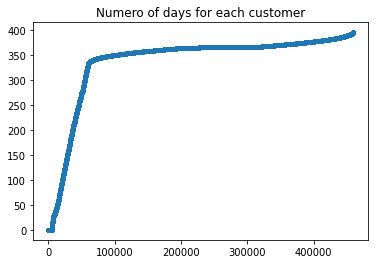

In [7]:
ax = df_diff_date.sort_values().reset_index()['S_2'].plot(style='.')
ax.set_title('Numero of days for each customer')

In [8]:
df_custID_date.set_index('customer_ID', inplace=True)
print(df_custID_date.loc['3aa011de85a1a4ab4f0687190f181439a7f7bff8d08887972e9c72633cdd72e7']) #1 day 
print()
print(df_custID_date.loc['2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f832420a84242b0aad2c']) #395 days
df_samples_by_id = df_custID_date.groupby(level=0).count()
df_samples_by_id.columns = ['Num_Dates']
display(df_samples_by_id.sort_values('Num_Dates').iloc[0:10,])
display(df_samples_by_id.sort_values('Num_Dates').iloc[-10:,])
gc.collect()

S_2    2018-03-31
Name: 3aa011de85a1a4ab4f0687190f181439a7f7bff8d08887972e9c72633cdd72e7, dtype: object

                                                           S_2
customer_ID                                                   
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-03-01
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-04-14
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-05-01
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-06-29
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-07-24
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-08-31
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-09-14
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-10-11
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-11-24
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-12-14
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2018-01-02
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2018-02-16
2f4def50b25fc

,Num_Dates
customer_ID,
268ba31cb8ca378b7355e45ee2d476c8f245f5d7f7c5ac8d2220da790692354d,1
398b2284afa95bcb5e45b9d0a12b3b9489417c7e85e3d4201949126dea87dfb2,1
f6a5f41c78d34e3283f4a5f1ab5dd84195783af511fc3a2b450e459a1eca6371,1
914821e33ef409f4f2c3b1e82c21d69bf18d5c7f8a3bd470e8f32eade782440c,1
d7eac493c711f26e608cc619384fc0eb6df04859da94bb5bfde386b75eb4c14f,1
be7a4f53b7f695c08c1364ef8b981f0bbea32bdfa7cddcf7738a78096d8e3a05,1
353ba249166e0506a004fd474275f8c3d68b9670a786f07a61c58d866895a2e3,1
a1c70f57d0ae651ac7e0253523ec43998d3950201235d22554e79f2c2f24334d,1
270048c153b02328383135b66e6f0ec336087a0f367348d70d00057fd515c4e8,1


,Num_Dates
customer_ID,
5c6b5ae2c487197e8cbc2d7663dc84878bd09c7fdb9699c0492a3cd64f352cef,13
5c6b3fc73f9c3481648a9b9750c3785c3218a0c67fd630e710641ad402d13c9f,13
5c6aef8aac83c5114abd735449d6270d8c9c4db4af3fa56ef3226ce9cffee4ff,13
5c6aacbaefc8818b2d3604bad2cc449ac3b289b1f524f731d5e1228b675b900c,13
5c6a594f885690556b6f77946f996bc03b9ed62623f7499f06991df8af1b5b20,13
5c6a469918b7badb212b6f33feb344096202679a44473295c4cb54a295801d35,13
5c6a423106d22db96000f5c02dde5de937b18ea1d653ccdf19bba6777a54aafb,13
5c6a3483b4bb775550043ae126163ec1d9216dececfcaf20502e1a4599c333b8,13
5c6bded8a6ba8c94ad66e6210d58d5008813c5192b740e1ef0d0476151d02ca5,13


0

In [9]:
df_customers_by_sample  = df_samples_by_id.reset_index().groupby('Num_Dates').count()
df_customers_by_sample

,customer_ID
Num_Dates,
1,5120
2,6098
3,5778
4,4673
5,4671
6,5515
7,5198
8,6110
9,6411


# 2. Check features

In [10]:
import matplotlib.pyplot as plt
color = sns.color_palette()

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

In [11]:
def get_features(all_features):
    dict_feat = {'P':[], 'S':[], 'D':[], 'B':[], 'R':[]}
    for feat in all_features:
        name, _ = feat.split('_')
        if name in dict_feat:
            dict_feat[name].append(feat)
    return dict_feat

all_features = df_data_train_parquet.columns
dict_features = get_features(list(all_features))
print('P-payment', len(dict_features['P']))
print('S-spend', len(dict_features['S']))
print('D-delinquency', len(dict_features['D']))
print('B-balance', len(dict_features['B']))
print('R-risk', len(dict_features['R']))

P-payment 3
S-spend 22
D-delinquency 96
B-balance 40
R-risk 28


In [17]:
data = df_data_train_parquet[['customer_ID']+dict_features['R']]
data.set_index('customer_ID', inplace=True)

data = df_samples_by_id.join(data, how='inner') #join the num_samples by id
data = df_labels_train.join(data, how='inner') #join the labels
print(data.shape)
display(data.iloc[0:3])
gc.collect()
gc.collect()

(5531451, 30)


,target,Num_Dates,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,...,R_19,R_20,R_21,R_22,R_23,R_24,R_25,R_26,R_27,R_28
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,13,0.009228,0,0,0,0,0.008363,0.0,0,...,0,0,0,0,0,0,0,-1,1.008949,0
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,13,0.006151,0,0,0,0,0.004030,0.0,0,...,0,0,0,0,0,0,0,-1,1.003205,0
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,13,0.006815,0,0,0,0,0.006838,0.0,0,...,0,0,0,0,0,0,0,-1,1.000754,0


0

In [18]:
data = data[data['Num_Dates'] == 13]
data.shape

(5018442, 30)

In [19]:
# check the number of samples: number_customers*number_samples(13)
if df_customers_by_sample.loc[13].values[0]*13 == data.shape[0]:
    print(True)

print("The group of customers with 13 samples are:",df_customers_by_sample.loc[13].values[0], ' with 13 samples is a total:', 
      df_customers_by_sample.loc[13].values[0]*13,'\n', 'which represent ',(df_customers_by_sample.loc[13].values[0]*13)/5531451, 
      '% of the total of samples in the database, that is 5531451')    

True
The group of customers with 13 samples are: 386034  with 13 samples is a total: 5018442 
 which represent  0.907255980392848 % of the total of samples in the database, that is 5531451


### Features Analysis

In [15]:
def boxhist(column, df, figsize=(10,5)):
    ## this code was taken from https://towardsdatascience.com/machine-learning-predicting-bank-loan-defaults-d48bffb9aee2
    variable = df[column].values 
    f, (ax_box, ax_hist) = plt.subplots(2, figsize=figsize, sharex=True, gridspec_kw= {"height_ratios": (1.0, 2)})
    mean=np.mean(variable)
    median=np.median(variable)
    
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.set_title(column)
    
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    
    plt.title(column, fontsize=10, loc="center")
    plt.legend({'Mean':mean,'Median':median})
    ax_box.set(xlabel='')
    plt.show()
    
def type_and_nulls(df):
    df_type = pd.concat([pd.DataFrame(df.dtypes), df.isnull().sum().to_frame().rename(columns={0:'nulls'})], axis=1)
    display(df_type)
    display(df.dtypes.value_counts())
    not_nulls = list((df_type[df_type['nulls']==0]).index)
    print('Not null features: ', not_nulls)
    return not_nulls    

def plot_transformations(data, column, min_value, limit_value=1, with_log=True, with_log_slope=True, slope=1e-4):
    
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    print('data type:', data[[column]].dtypes.values)
    print('total samples:', data[[column]].shape[0], ',  num of extreme values:', np.sum(data[[column]]>limit_value).values)
    print('With limit value of limit value of ',limit_value, ' that represent ', 
          np.sum(data[[column]]>limit_value).values[0]/data[[column]].shape[0], '% the data')
    display(data[[column]][data[column]<=limit_value].describe().T)
    data[column][data[column]<=limit_value].hist(bins=20, ec="b", alpha=0.9, grid=False, ax=ax[0])
    ax[0].set_title('With limit value of '+str(limit_value))
    
    if min_value>0:
        print('With log transformation')
        display(np.log(data[[column]]).describe().T)
        np.log(data[[column]]).hist(bins=20, ec="b", alpha=0.9, grid=False, ax=ax[1])
        ax[1].set_title('With log transformation')
    
    if with_log_slope:
        print('With log transformation and ', str(slope),' as a slope value')
        display(np.log(data[[column]]+1e-4).describe().T)
        np.log(data[[column]]+1e-4).hist(bins=20, ec="b", alpha=0.9, grid=False, ax=ax[2])
        ax[2].set_title('With log transformation and '+ str(slope)+' as a slope value')
        
        
def plot_discrete_data(data, column):        
    data[[column]].plot(style='.')
    data[[column]].sort_values(column).plot(style='.')

    tmp = data[['target', column]][data[column]==0]
    print('0s in the same position than the target' ,np.sum((tmp['target']+tmp[column]) == 0))
    print('correlation with \n' ,data[['target', column]].corr())
    print('value counts:\n', data[column].value_counts())     

In [ ]:
def type_and_nulls(df):
    df_type = pd.concat([pd.DataFrame(df.dtypes), df.isnull().sum().to_frame().rename(columns={0:'nulls'})], axis=1)
    display(df_type)
    display(df.dtypes.value_counts())
    not_nulls = list((df_type[df_type['nulls']==0]).index)
    print('Not null features: ', not_nulls)
    return not_nulls

In [20]:
not_null_features = type_and_nulls(data)
gc.collect()

,0,nulls
target,int64,0
Num_Dates,int64,0
R_1,float32,0
R_2,int8,0
R_3,int8,0
R_4,int8,0
R_5,int8,0
R_6,float32,0
R_7,float32,1
R_8,int8,0


int8       21
float32     6
int64       2
int16       1
dtype: int64

Not null features:  ['target', 'Num_Dates', 'R_1', 'R_2', 'R_3', 'R_4', 'R_5', 'R_6', 'R_8', 'R_9', 'R_10', 'R_11', 'R_13', 'R_15', 'R_16', 'R_17', 'R_18', 'R_19', 'R_20', 'R_21', 'R_22', 'R_23', 'R_24', 'R_25', 'R_26', 'R_28']


69

array([[<AxesSubplot:title={'center':'target'}>,
        <AxesSubplot:title={'center':'Num_Dates'}>,
        <AxesSubplot:title={'center':'R_1'}>,
        <AxesSubplot:title={'center':'R_2'}>,
        <AxesSubplot:title={'center':'R_3'}>],
       [<AxesSubplot:title={'center':'R_4'}>,
        <AxesSubplot:title={'center':'R_5'}>,
        <AxesSubplot:title={'center':'R_6'}>,
        <AxesSubplot:title={'center':'R_8'}>,
        <AxesSubplot:title={'center':'R_9'}>],
       [<AxesSubplot:title={'center':'R_10'}>,
        <AxesSubplot:title={'center':'R_11'}>,
        <AxesSubplot:title={'center':'R_13'}>,
        <AxesSubplot:title={'center':'R_15'}>,
        <AxesSubplot:title={'center':'R_16'}>],
       [<AxesSubplot:title={'center':'R_17'}>,
        <AxesSubplot:title={'center':'R_18'}>,
        <AxesSubplot:title={'center':'R_19'}>,
        <AxesSubplot:title={'center':'R_20'}>,
        <AxesSubplot:title={'center':'R_21'}>],
       [<AxesSubplot:title={'center':'R_22'}>,
        <A

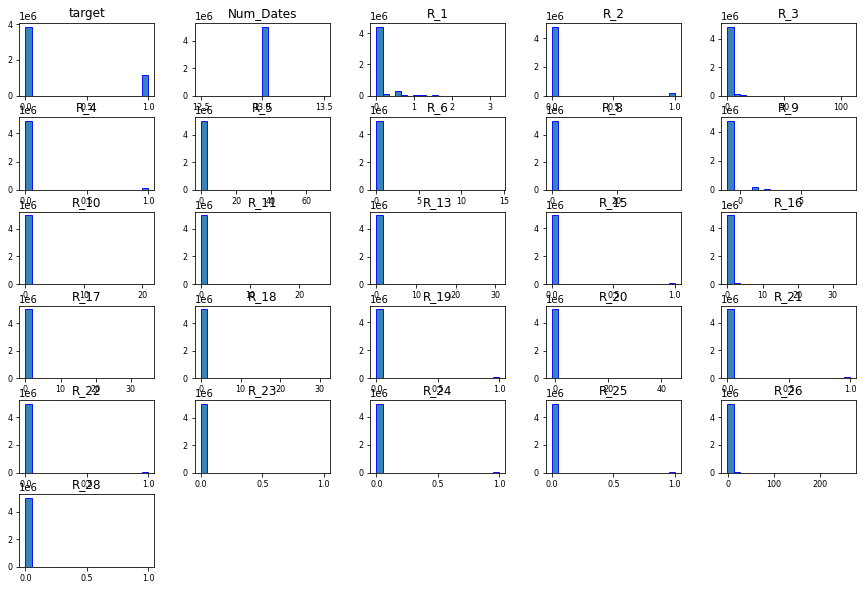

In [21]:
## features distribution
data[not_null_features].hist(figsize=(15,10), bins=20, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)

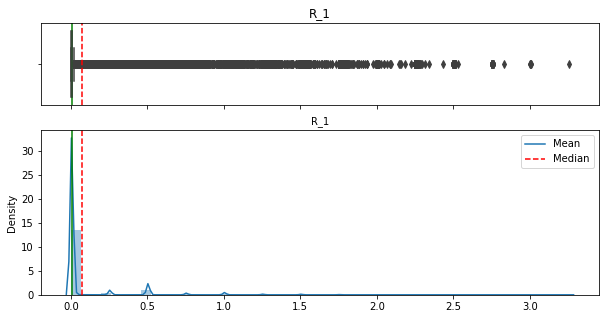

,count,mean,std,min,25%,50%,75%,max
R_1,5018442.0,0.075041,0.220784,1.534223e-09,0.002877,0.005744,0.008603,3.256284


In [22]:
column = 'R_1' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

data type: [dtype('float32')]
total samples: 5018442 ,  num of extreme values: [0]
With limit value of limit value of  400  that represent  0.0 % the data


,count,mean,std,min,25%,50%,75%,max
R_1,5018442.0,0.075041,0.220784,1.534223e-09,0.002877,0.005744,0.008603,3.256284


With log transformation


,count,mean,std,min,25%,50%,75%,max
R_1,5018442.0,-4.996011,1.86704,-20.295242,-5.85096,-5.159579,-4.75559,1.180587


With log transformation and  0.0001  as a slope value


,count,mean,std,min,25%,50%,75%,max
R_1,5018442.0,-4.947219,1.800271,-9.210325,-5.816794,-5.14232,-4.744034,1.180618


9485

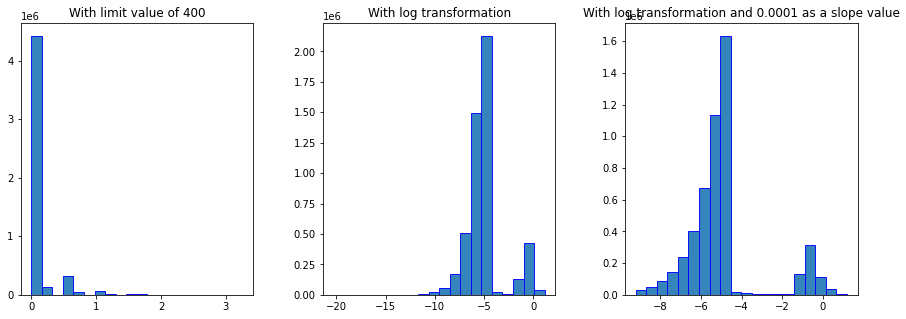

In [23]:
plot_transformations(data, column, min_value, limit_value=400, with_log_slope=True, slope=1e-4)
gc.collect() 


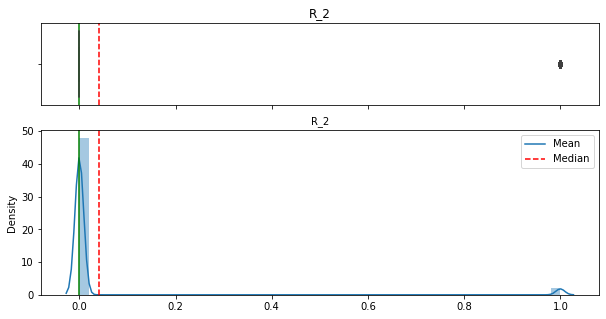

,count,mean,std,min,25%,50%,75%,max
R_2,5018442.0,0.041439,0.199304,0.0,0.0,0.0,0.0,1.0


In [24]:
column = 'R_2'
boxhist(column, data)
display(data[[column]].describe().T)

0s in the same position than the target 3810358
correlation with 
          target      R_2
target  1.00000  0.27221
R_2     0.27221  1.00000
value counts:
 0    4810481
1     207961
Name: R_2, dtype: int64


21226

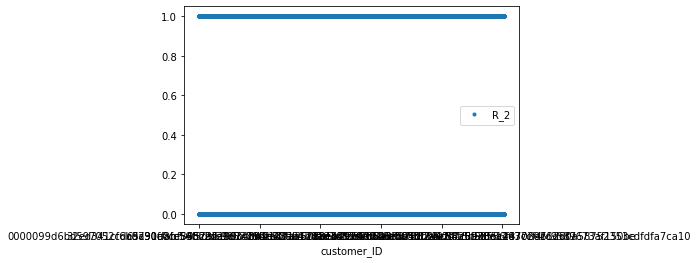

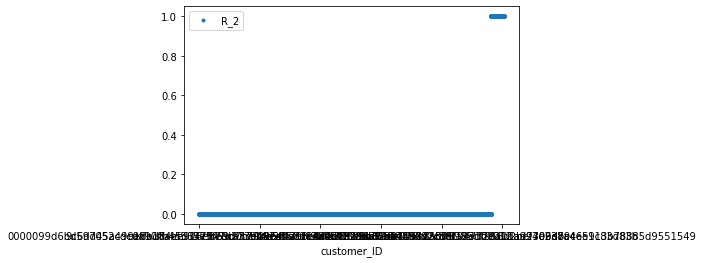

In [25]:
plot_discrete_data(data, column)
gc.collect()

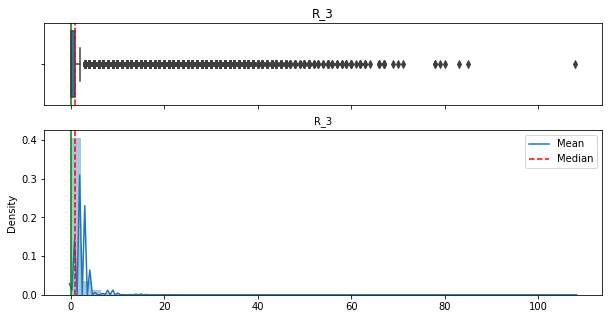

,count,mean,std,min,25%,50%,75%,max
R_3,5018442.0,1.013166,1.898101,0.0,0.0,0.0,1.0,108.0


In [26]:
column = 'R_3'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 2387135
correlation with 
           target       R_3
target  1.000000  0.265771
R_3     0.265771  1.000000
value counts:
 0     2832713
1     1052673
2      510707
3      253722
4      140487
       ...   
85          1
64          1
79          1
69          1
61          1
Name: R_3, Length: 76, dtype: int64


16257

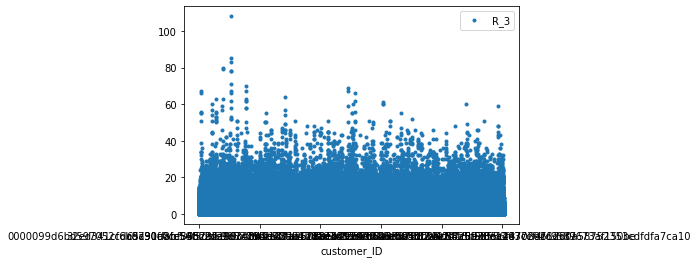

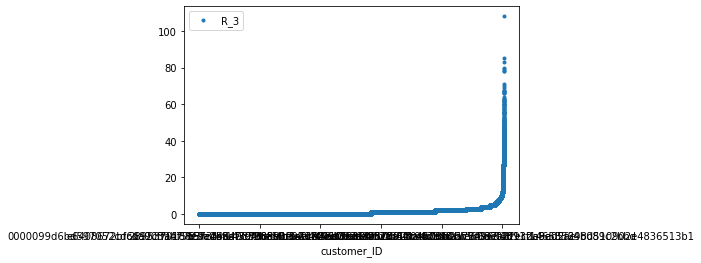

In [27]:
plot_discrete_data(data, column)
gc.collect()

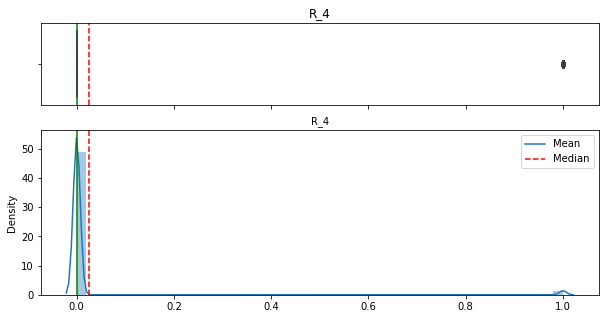

,count,mean,std,min,25%,50%,75%,max
R_4,5018442.0,0.025587,0.1579,0.0,0.0,0.0,0.0,1.0


In [28]:
column = 'R_4' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 3832834
correlation with 
           target       R_4
target  1.000000  0.228036
R_4     0.228036  1.000000
value counts:
 0    4890035
1     128407
Name: R_4, dtype: int64


15657

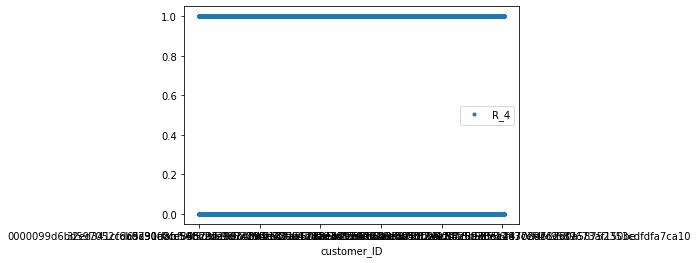

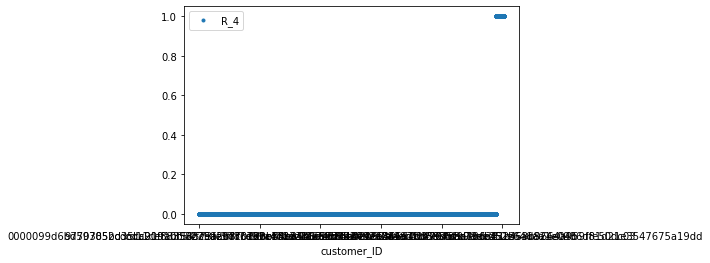

In [29]:
plot_discrete_data(data, column)
gc.collect()

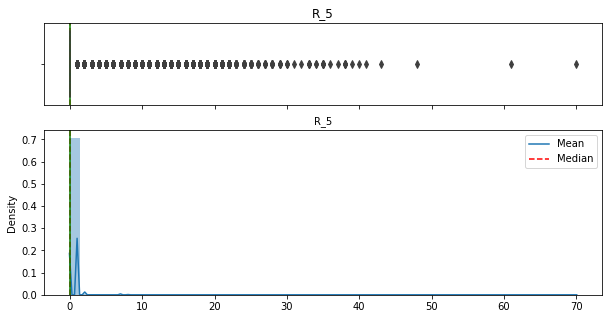

,count,mean,std,min,25%,50%,75%,max
R_5,5018442.0,0.057719,0.50566,0.0,0.0,0.0,0.0,70.0


In [30]:
column = 'R_5' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 3828831
correlation with 
           target       R_5
target  1.000000  0.173191
R_5     0.173191  1.000000
value counts:
 0     4878850
1       84559
2       25212
3       11130
4        6135
5        3829
6        2460
7        1711
8        1226
9         858
10        608
11        431
12        326
13        247
14        202
16        124
15        114
17         97
18         71
19         60
20         34
22         33
21         30
23         15
24         13
25         13
28          8
27          6
26          6
35          5
29          5
38          4
33          4
30          3
34          2
31          1
43          1
61          1
41          1
37          1
70          1
48          1
32          1
36          1
39          1
40          1
Name: R_5, dtype: int64


16103

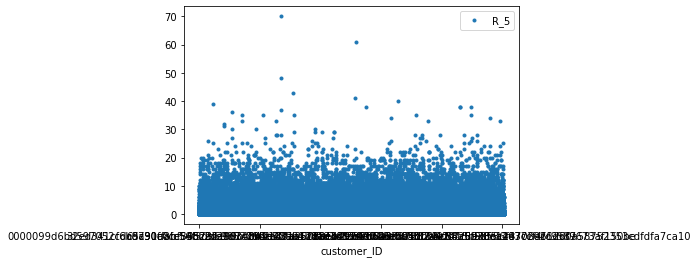

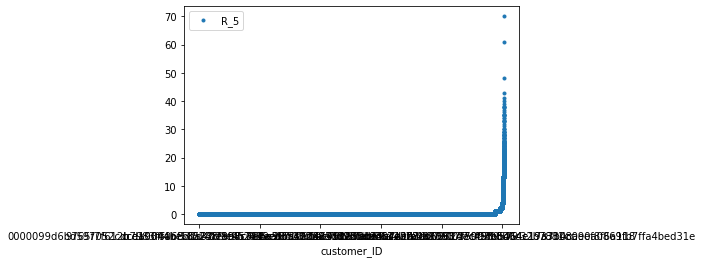

In [31]:
plot_discrete_data(data, column)
gc.collect()

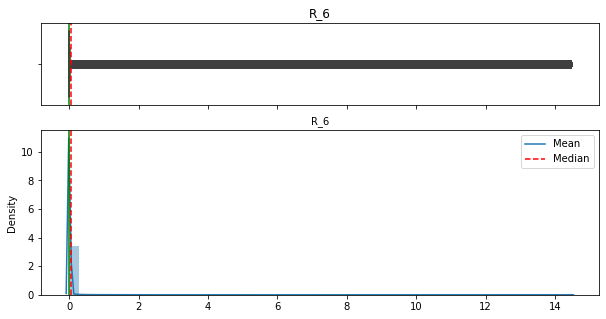

,count,mean,std,min,25%,50%,75%,max
R_6,5018442.0,0.056931,0.63092,4.650681e-10,0.00259,0.005182,0.007774,14.448201


In [32]:
column = 'R_6'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

data type: [dtype('float32')]
total samples: 5018442 ,  num of extreme values: [0]
With limit value of limit value of  400  that represent  0.0 % the data


,count,mean,std,min,25%,50%,75%,max
R_6,5018442.0,0.056931,0.63092,4.650681e-10,0.00259,0.005182,0.007774,14.448201


With log transformation


,count,mean,std,min,25%,50%,75%,max
R_6,5018442.0,-5.443922,1.337099,-21.488838,-5.956102,-5.262579,-4.856982,2.67057


With log transformation and  0.0001  as a slope value


,count,mean,std,min,25%,50%,75%,max
R_6,5018442.0,-5.389658,1.24995,-9.210336,-5.918219,-5.243465,-4.844201,2.670577


16085

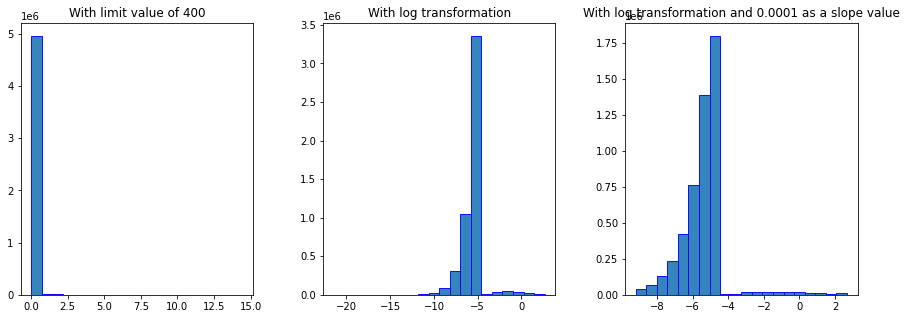

In [33]:
plot_transformations(data, column, min_value, limit_value=400, with_log_slope=True, slope=1e-4)
gc.collect()

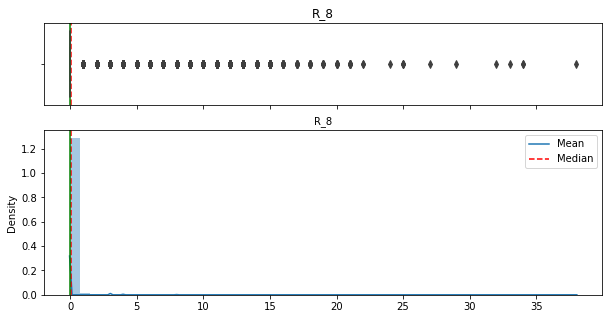

,count,mean,std,min,25%,50%,75%,max
R_8,5018442.0,0.032155,0.298472,0.0,0.0,0.0,0.0,38.0


In [34]:
column = 'R_8' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 3835525
correlation with 
          target      R_8
target  1.00000  0.15884
R_8     0.15884  1.00000
value counts:
 0     4917091
1       71987
2       16560
3        6074
4        2869
5        1550
6         811
7         476
8         349
9         227
10        127
11         97
12         53
13         43
15         30
14         25
16         17
18         12
17         10
21          8
20          7
19          6
25          3
34          2
22          2
38          1
33          1
29          1
32          1
24          1
27          1
Name: R_8, dtype: int64


21738

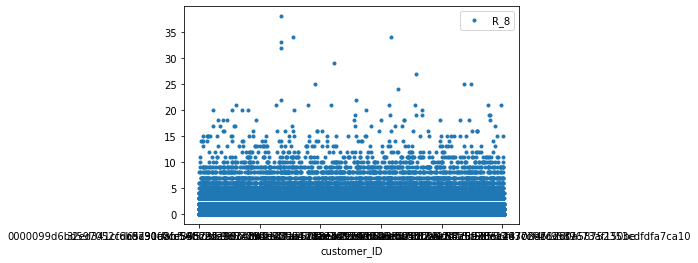

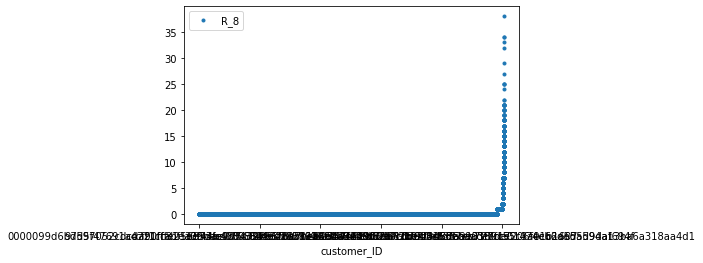

In [35]:
plot_discrete_data(data, column)
gc.collect()

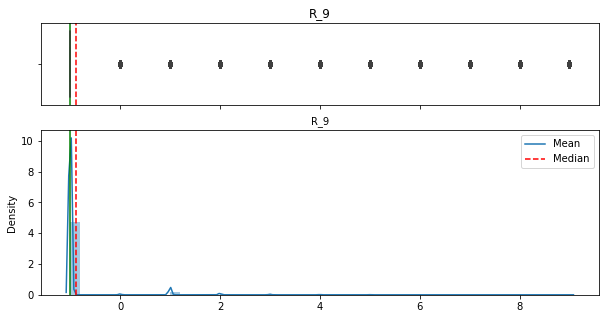

,count,mean,std,min,25%,50%,75%,max
R_9,5018442.0,-0.877301,0.58713,-1.0,-1.0,-1.0,-1.0,9.0


In [36]:
column = 'R_9' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 7848
correlation with 
           target       R_9
target  1.000000  0.163578
R_9     0.163578  1.000000
value counts:
 -1    4758930
 1     180606
 2      35563
 0      18465
 3      12471
 4       5362
 5       2729
 6       1566
 9       1430
 7        819
 8        501
Name: R_9, dtype: int64


15815

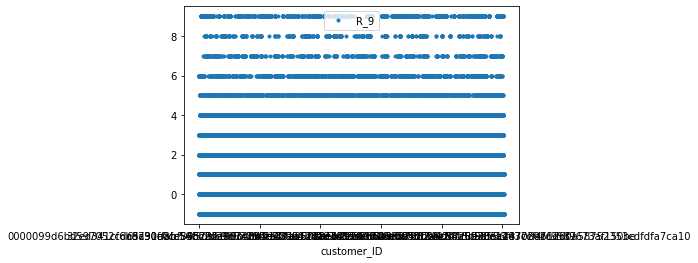

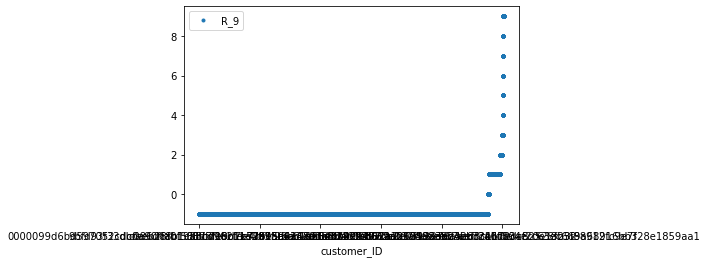

In [37]:
plot_discrete_data(data, column)
gc.collect()

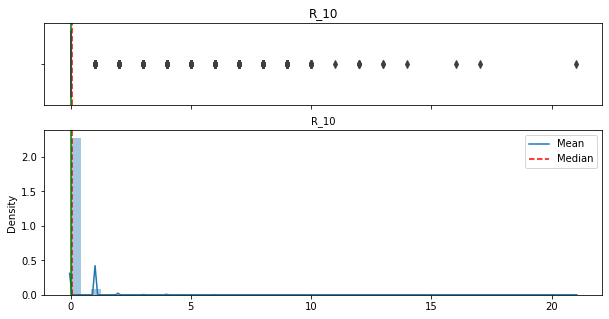

,count,mean,std,min,25%,50%,75%,max
R_10,5018442.0,0.057017,0.298618,0.0,0.0,0.0,0.0,21.0


In [38]:
column = 'R_10' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 3794605
correlation with 
           target      R_10
target  1.000000  0.238915
R_10    0.238915  1.000000
value counts:
 0     4793469
1      181389
2       31872
3        8096
4        2324
5         766
6         317
7         112
8          39
9          32
10         14
12          5
13          2
17          1
21          1
16          1
14          1
11          1
Name: R_10, dtype: int64


15271

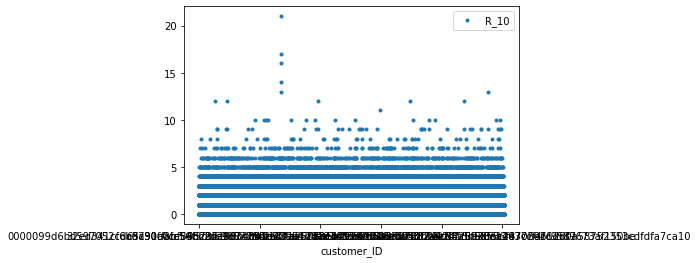

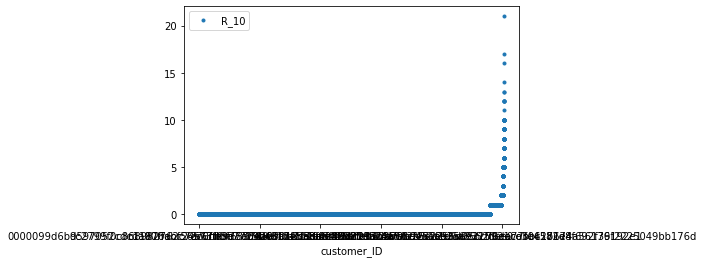

In [39]:
plot_discrete_data(data, column)
gc.collect()

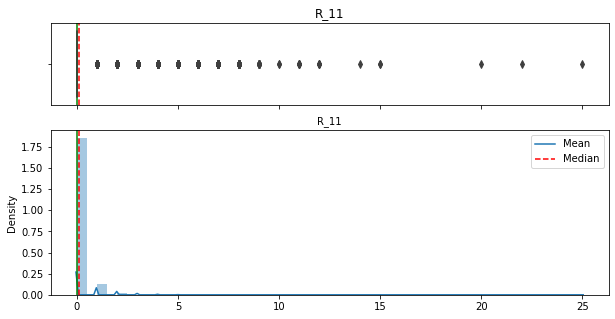

,count,mean,std,min,25%,50%,75%,max
R_11,5018442.0,0.085339,0.334763,0.0,0.0,0.0,0.0,25.0


In [40]:
column = 'R_11' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 3620492
correlation with 
           target      R_11
target  1.000000  0.083601
R_11    0.083601  1.000000
value counts:
 0     4656565
1      308442
2       43866
3        7344
4        1581
5         395
6         144
7          51
8          26
9          11
11          5
12          4
10          2
15          2
25          1
22          1
14          1
20          1
Name: R_11, dtype: int64


15651

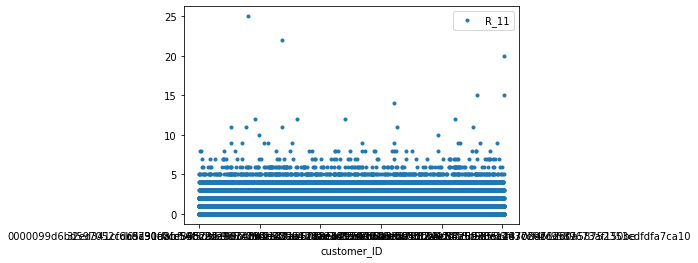

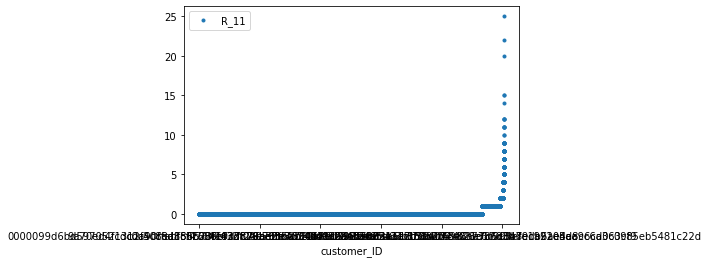

In [41]:
plot_discrete_data(data, column)
gc.collect()

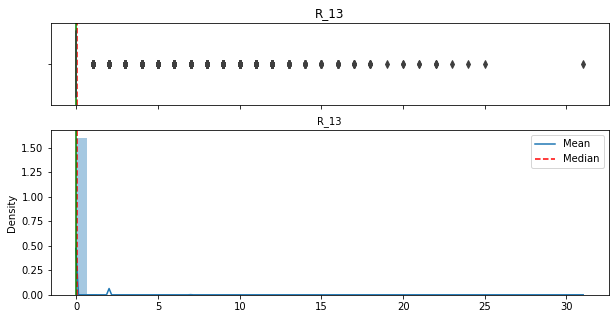

,count,mean,std,min,25%,50%,75%,max
R_13,5018442.0,0.014555,0.203416,0.0,0.0,0.0,0.0,31.0


In [42]:
column = 'R_13' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 3849774
correlation with 
           target      R_13
target  1.000000  0.113461
R_13    0.113461  1.000000
value counts:
 0     4973634
1       31220
2        7516
3        2772
4        1410
5         740
6         444
7         241
8         160
9         100
10         54
11         45
12         34
13         18
14         12
16         11
15          8
17          6
18          5
22          3
21          2
20          2
19          1
24          1
31          1
23          1
25          1
Name: R_13, dtype: int64


15792

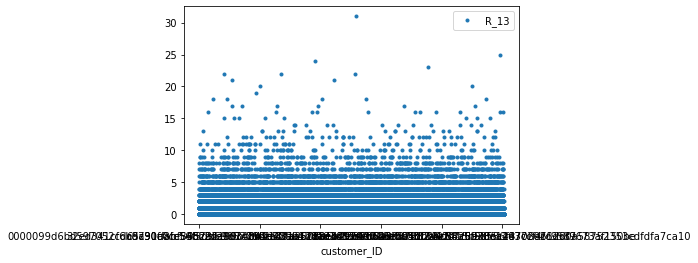

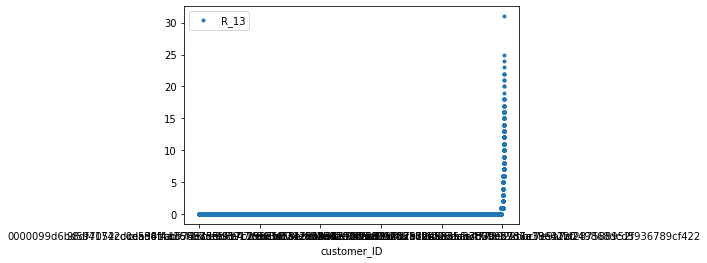

In [43]:
plot_discrete_data(data, column)
gc.collect()

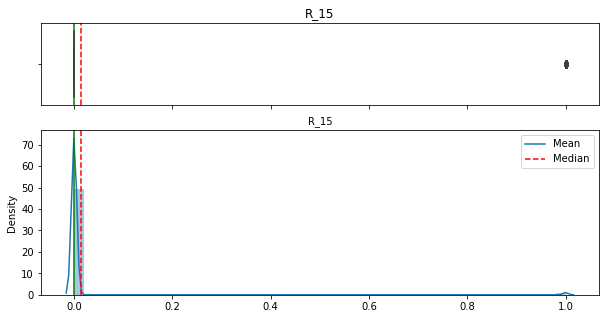

,count,mean,std,min,25%,50%,75%,max
R_15,5018442.0,0.013912,0.117128,0.0,0.0,0.0,0.0,1.0


In [44]:
column = 'R_15' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 3832825
correlation with 
          target     R_15
target  1.00000  0.12592
R_15    0.12592  1.00000
value counts:
 0    4948623
1      69819
Name: R_15, dtype: int64


15965

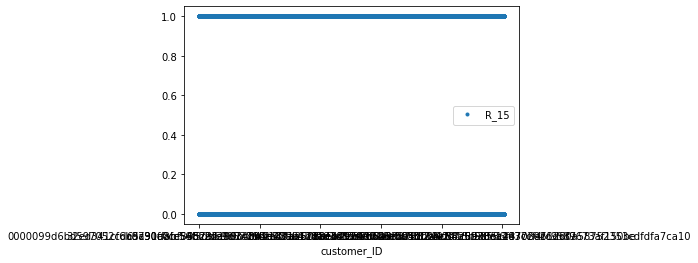

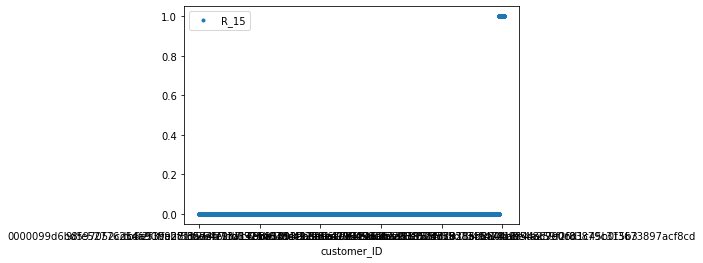

In [45]:
plot_discrete_data(data, column)
gc.collect()

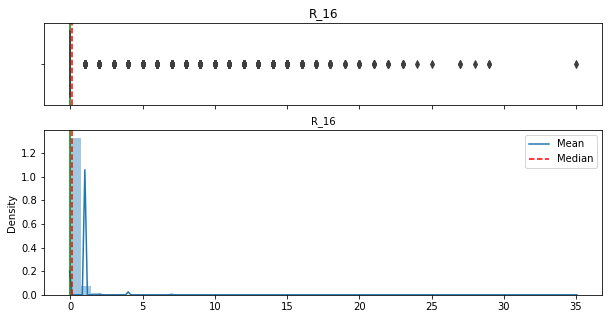

,count,mean,std,min,25%,50%,75%,max
R_16,5018442.0,0.098017,0.449617,0.0,0.0,0.0,0.0,35.0


In [46]:
column = 'R_16' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 3649848
correlation with 
           target      R_16
target  1.000000  0.121515
R_16    0.121515  1.000000
value counts:
 0     4665020
1      275878
2       48876
3       15018
4        6343
5        3198
6        1657
7         963
8         549
9         289
10        189
11        147
12         81
13         67
14         45
15         35
16         21
17         16
18         13
20         10
19          6
21          5
23          4
22          4
29          2
27          2
28          1
24          1
25          1
35          1
Name: R_16, dtype: int64


16036

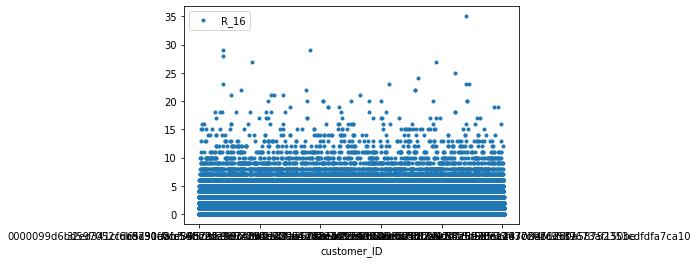

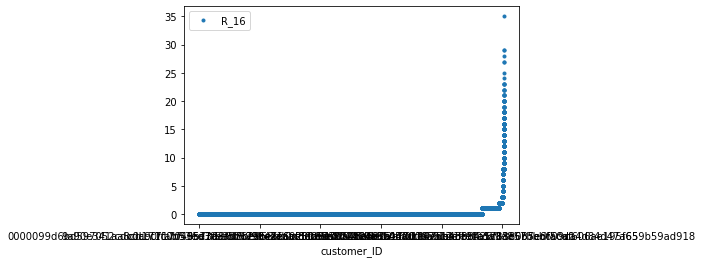

In [47]:
plot_discrete_data(data, column)
gc.collect()

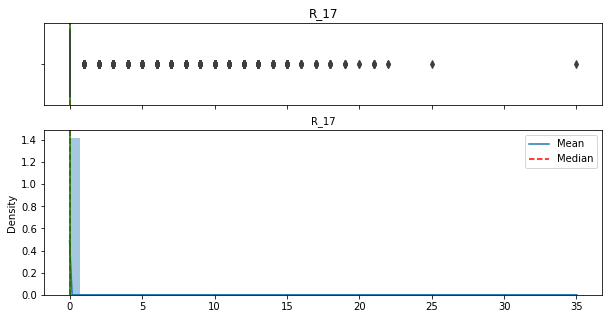

,count,mean,std,min,25%,50%,75%,max
R_17,5018442.0,0.011009,0.19703,0.0,0.0,0.0,0.0,35.0


In [48]:
column = 'R_17' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 3851528
correlation with 
           target      R_17
target  1.000000  0.086721
R_17    0.086721  1.000000
value counts:
 0     4987371
1       21081
2        5096
3        1915
4        1129
5         584
6         386
7         244
8         178
9         127
10         88
11         68
12         43
13         38
14         24
15         22
17         10
16         10
18          9
21          7
19          6
22          2
20          2
35          1
25          1
Name: R_17, dtype: int64


16421

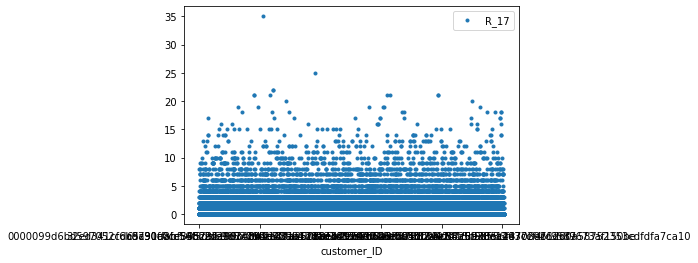

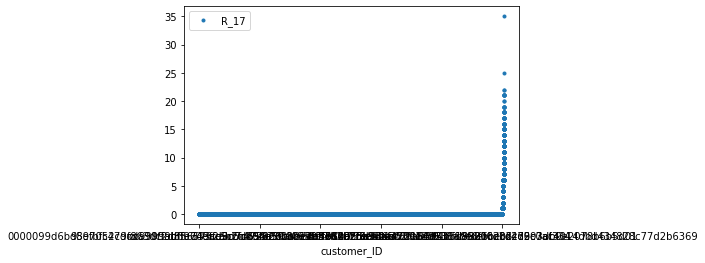

In [49]:
plot_discrete_data(data, column)
gc.collect()

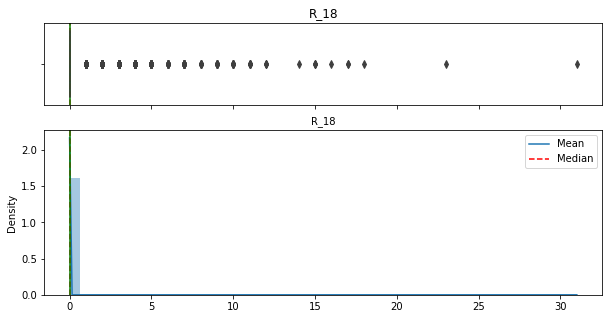

,count,mean,std,min,25%,50%,75%,max
R_18,5018442.0,0.000273,0.044765,0.0,0.0,0.0,0.0,31.0


In [50]:
column = 'R_18' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 3855059
correlation with 
           target      R_18
target  1.000000  0.004564
R_18    0.004564  1.000000
value counts:
 0     5018069
1         132
2          66
4          39
3          33
5          28
7          18
6          14
9           9
10          8
8           7
11          6
15          3
12          3
17          2
23          1
16          1
14          1
31          1
18          1
Name: R_18, dtype: int64


16046

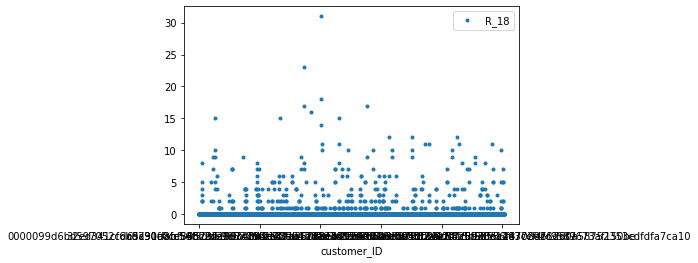

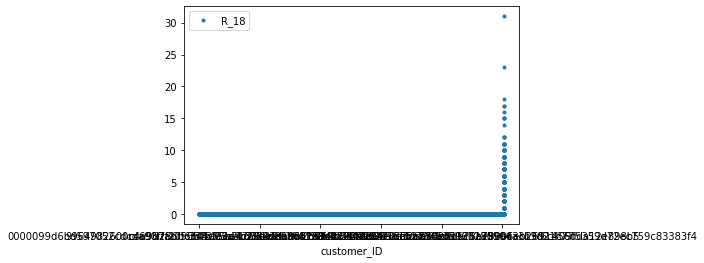

In [51]:
plot_discrete_data(data, column)
gc.collect()

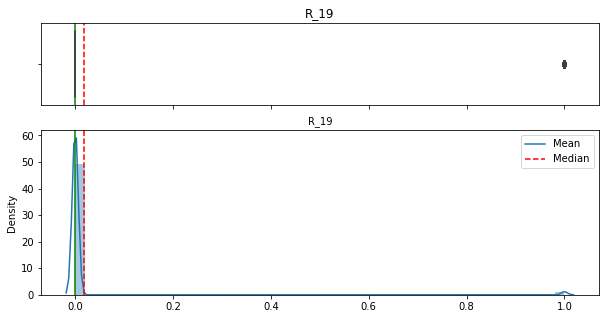

,count,mean,std,min,25%,50%,75%,max
R_19,5018442.0,0.018592,0.13508,0.0,0.0,0.0,0.0,1.0


In [52]:
column = 'R_19' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 3815480
correlation with 
          target     R_19
target  1.00000  0.11162
R_19    0.11162  1.00000
value counts:
 0    4925138
1      93304
Name: R_19, dtype: int64


15893

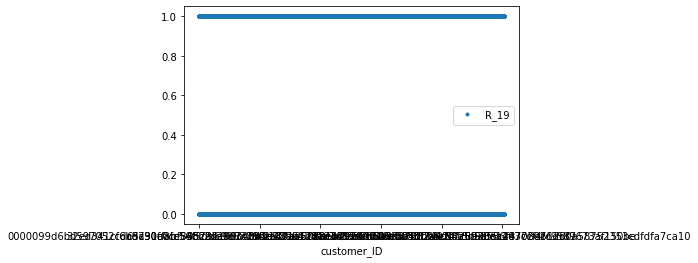

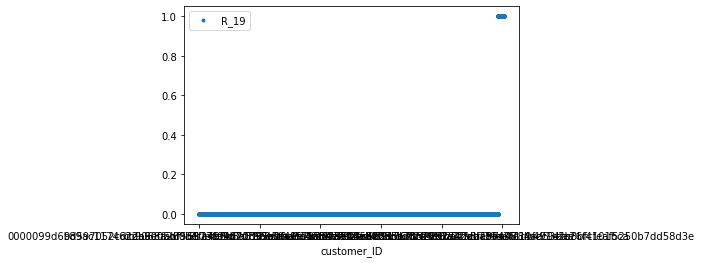

In [53]:
plot_discrete_data(data, column)
gc.collect()

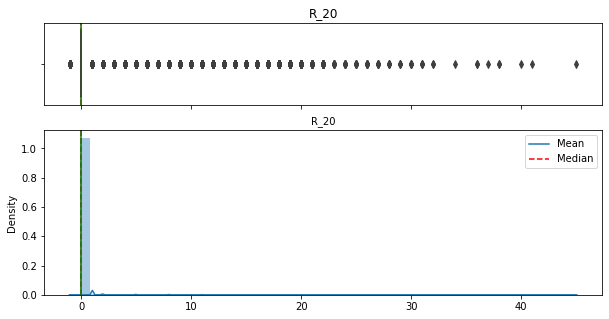

,count,mean,std,min,25%,50%,75%,max
R_20,5018442.0,0.031627,0.378599,-1.0,0.0,0.0,0.0,45.0


In [54]:
column = 'R_20' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 3838790
correlation with 
           target      R_20
target  1.000000  0.115479
R_20    0.115479  1.000000
value counts:
  0     4944338
 1       40953
 2       17061
 3        5821
 4        3663
 5        1912
 6        1256
 7         851
 8         646
 9         451
 10        346
 11        232
 12        197
 13        130
 14        108
 15         77
-1          73
 16         67
 18         47
 17         39
 19         37
 20         33
 22         22
 21         21
 24          8
 26          8
 23          8
 25          6
 27          6
 30          4
 28          4
 29          3
 31          3
 38          2
 36          2
 32          2
 37          1
 34          1
 45          1
 41          1
 40          1
Name: R_20, dtype: int64


15497

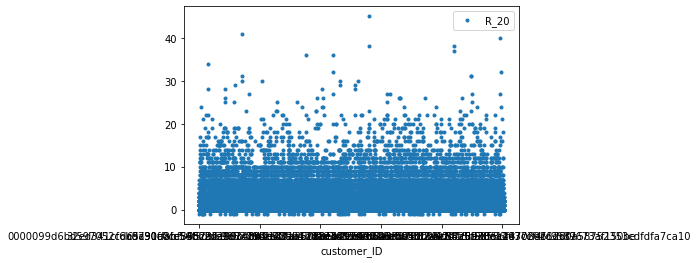

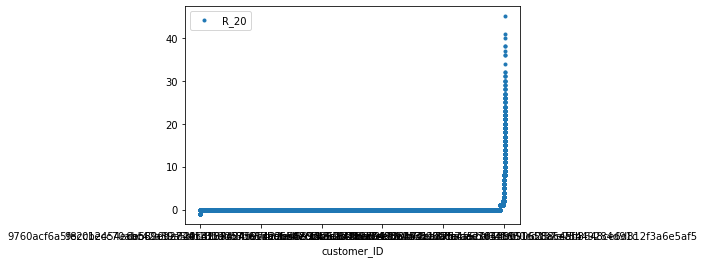

In [55]:
plot_discrete_data(data, column)
gc.collect()

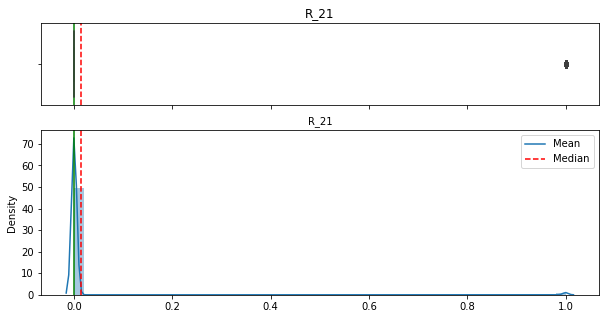

,count,mean,std,min,25%,50%,75%,max
R_21,5018442.0,0.01405,0.117696,0.0,0.0,0.0,0.0,1.0


In [56]:
column = 'R_21' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 3836931
correlation with 
          target     R_21
target  1.00000  0.14391
R_21    0.14391  1.00000
value counts:
 0    4947934
1      70508
Name: R_21, dtype: int64


15652

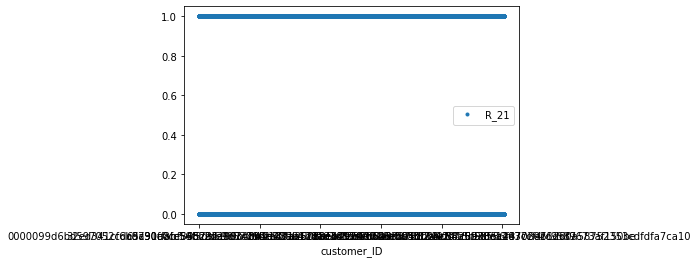

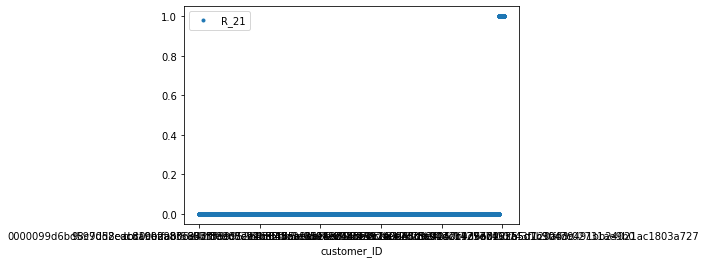

In [57]:
plot_discrete_data(data, column)
gc.collect()

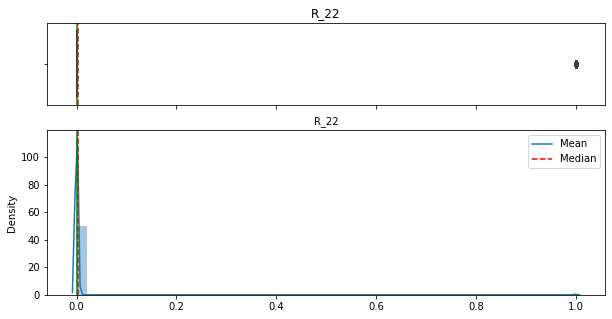

,count,mean,std,min,25%,50%,75%,max
R_22,5018442.0,0.003723,0.0609,0.0,0.0,0.0,0.0,1.0


In [58]:
column = 'R_22' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 3849895
correlation with 
           target      R_22
target  1.000000  0.069932
R_22    0.069932  1.000000
value counts:
 0    4999760
1      18682
Name: R_22, dtype: int64


15657

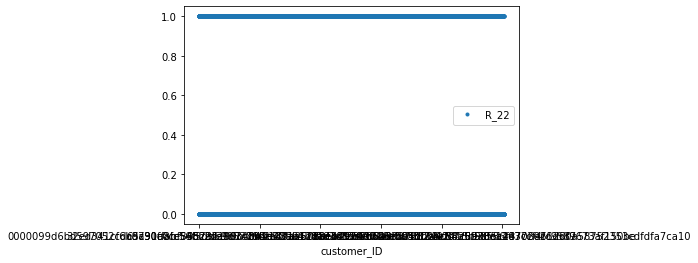

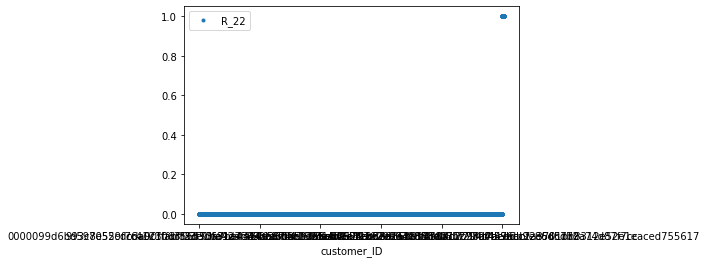

In [59]:
plot_discrete_data(data, column)
gc.collect()

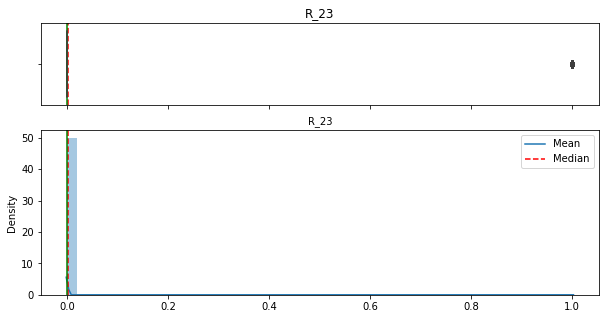

,count,mean,std,min,25%,50%,75%,max
R_23,5018442.0,0.0003,0.017326,0.0,0.0,0.0,0.0,1.0


In [60]:
column = 'R_23' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 3854698
correlation with 
           target      R_23
target  1.000000  0.017108
R_23    0.017108  1.000000
value counts:
 0    5016935
1       1507
Name: R_23, dtype: int64


15592

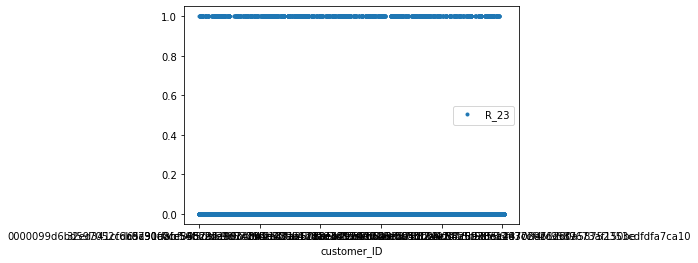

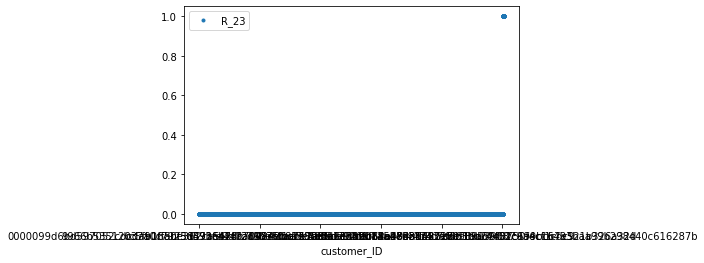

In [61]:

plot_discrete_data(data, column)
gc.collect()

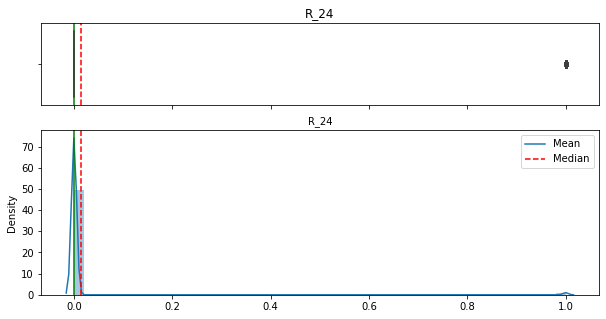

,count,mean,std,min,25%,50%,75%,max
R_24,5018442.0,0.013636,0.115974,0.0,0.0,0.0,0.0,1.0


In [62]:
column = 'R_24' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 3841058
correlation with 
           target      R_24
target  1.000000  0.156354
R_24    0.156354  1.000000
value counts:
 0    4950011
1      68431
Name: R_24, dtype: int64


15806

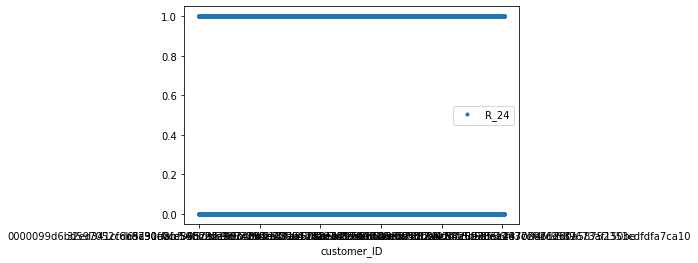

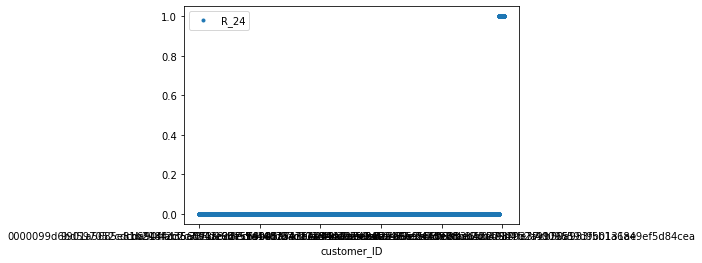

In [63]:
plot_discrete_data(data, column)
gc.collect()

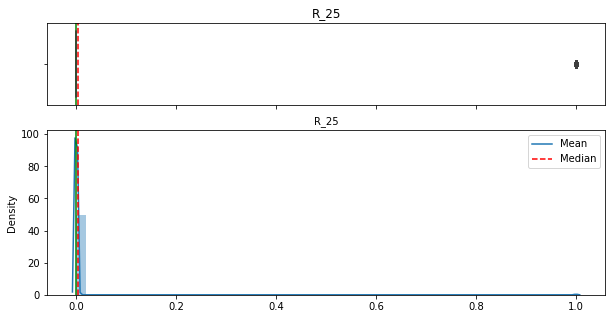

,count,mean,std,min,25%,50%,75%,max
R_25,5018442.0,0.003058,0.055216,0.0,0.0,0.0,0.0,1.0


In [64]:
column = 'R_25' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 3850960
correlation with 
           target      R_25
target  1.000000  0.064328
R_25    0.064328  1.000000
value counts:
 0    5003095
1      15347
Name: R_25, dtype: int64


15652

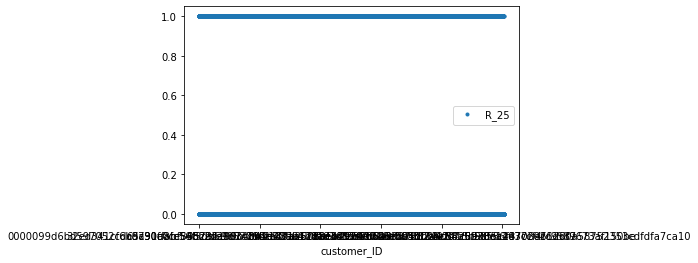

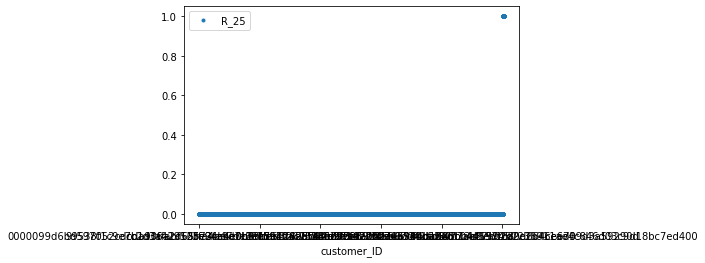

In [65]:
plot_discrete_data(data, column)
gc.collect()

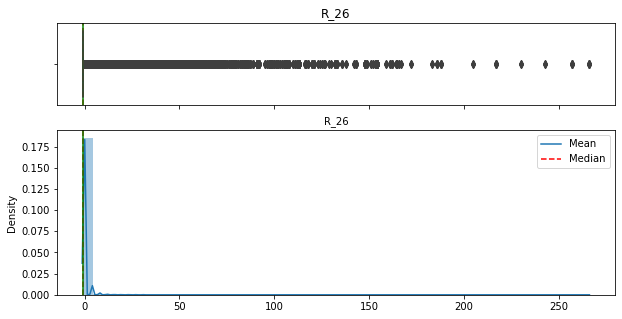

,count,mean,std,min,25%,50%,75%,max
R_26,5018442.0,-0.683569,2.337517,-1.0,-1.0,-1.0,-1.0,266.0


In [66]:
column = 'R_26' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 153500
correlation with 
           target      R_26
target  1.000000  0.152622
R_26    0.152622  1.000000
value counts:
 -1      4507800
 0       252848
 1       103982
 2        56230
 3        27500
         ...   
 103          3
 129          3
 152          3
 130          3
 142          3
Name: R_26, Length: 151, dtype: int64


15810

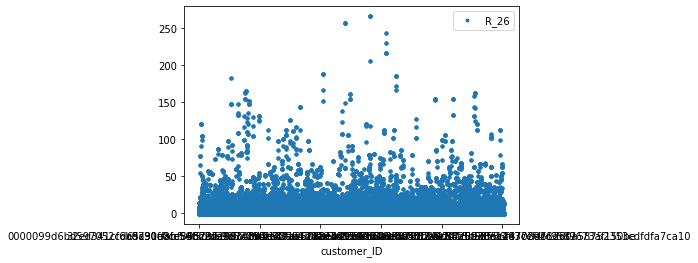

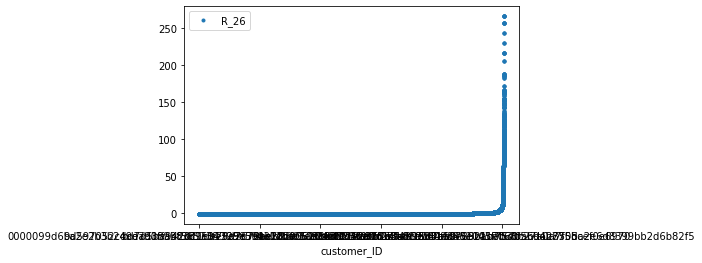

In [67]:
plot_discrete_data(data, column)
gc.collect()

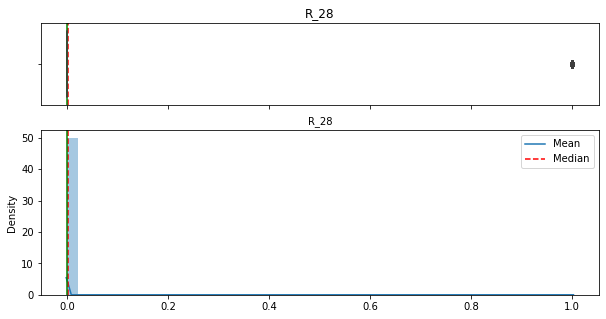

,count,mean,std,min,25%,50%,75%,max
R_28,5018442.0,0.000317,0.017808,0.0,0.0,0.0,0.0,1.0


In [68]:
column = 'R_28' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

0s in the same position than the target 3854718
correlation with 
           target      R_28
target  1.000000  0.018907
R_28    0.018907  1.000000
value counts:
 0    5016850
1       1592
Name: R_28, dtype: int64


15657

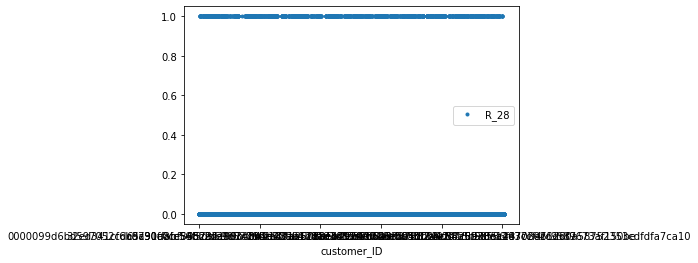

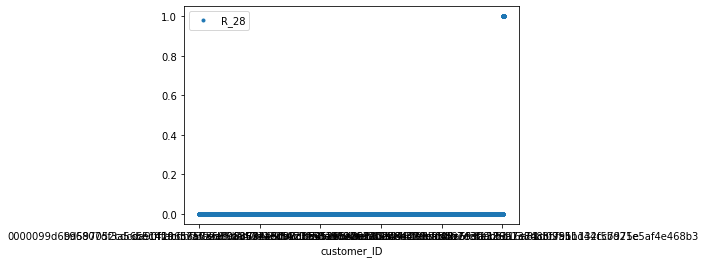

In [69]:
plot_discrete_data(data, column)
gc.collect()